In [2]:
from google.colab import files
file=files.upload()

Saving Iris_data.csv to Iris_data.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import io
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
dataset= pd.read_csv("Iris_data.csv")

In [5]:
dataset=dataset.dropna()
dataset.head()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa


In [6]:
df=dataset[['Petal_width','Petal_length','Sepal_width','Sepal_length']]

In [7]:
df['Length']=df.Sepal_length -df.Petal_length
df['Width']=df.Sepal_width -df.Petal_length
df=df.dropna()
X=df[['Length','Width']]
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Length,Width
0,3.7,2.1
1,3.5,1.6
2,3.4,1.9
3,3.1,1.6
4,3.6,2.2


In [8]:
Y=np.where(df['Petal_length'].shift(-1)>df['Petal_length'],1,-1)

In [9]:
split_percentage=0.7
split=int(split_percentage*len(df))
X_train=X[:split]
Y_train=Y[:split]
X_test=X[split:]
Y_test=Y[split:]

In [18]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,Y_train)
accuracy_train=accuracy_score(Y_train,knn.predict(X_train))
accuracy_test=accuracy_score(Y_test,knn.predict(X_test))
print("Train Data Accuracy :%.2f" %accuracy_train)
print("Test Data Accuracy :%.2f"%accuracy_test)

Train Data Accuracy :0.69
Test Data Accuracy :0.44


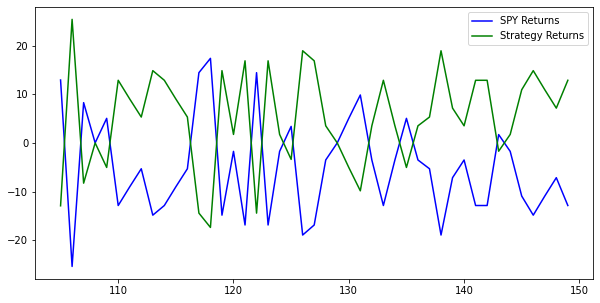

In [19]:
df['Predicted_Signal']=knn.predict(X)
df['SPY_Returns']=np.log(df['Petal_length']/df['Petal_length'].shift(1))
Cumulative_SPY_Returns=df[split:]['SPY_Returns'].cumsum()*100
df['Strategy_Returns']=df['SPY_Returns']*df['Predicted_Signal'].shift(1)
Cum_Strategy_Returns=df[split:]['Strategy_Returns'].cumsum()*100
plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_Returns,color='b',label='SPY Returns')
plt.plot(Cum_Strategy_Returns,color='g',label='Strategy Returns')
plt.legend()
plt.show()